In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12700\1382025039.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#load the dataset
dataset = pd.read_csv('Fertilizer Prediction.csv')

In [3]:
dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [5]:
dataset.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

# Null Value and unique value detection

In [6]:
import pandas as pd


# Find unique values in each column
unique_values = dataset.apply(lambda x: x.unique())

# Find null values in each column
null_values = dataset.isna().sum()

# Display unique values and null values
print("Unique Values in Each Column:")
print(unique_values)

print("\nNull Values in Each Column:")
print(null_values)


Unique Values in Each Column:
Temparature        [26, 29, 34, 32, 28, 25, 33, 30, 27, 31, 35, 3...
Humidity           [52, 65, 62, 54, 50, 64, 60, 58, 68, 70, 67, 5...
Moisture           [38, 45, 62, 34, 46, 35, 64, 50, 42, 33, 28, 4...
Soil Type                         [Sandy, Loamy, Black, Red, Clayey]
Crop Type          [Maize, Sugarcane, Cotton, Tobacco, Paddy, Bar...
Nitrogen           [37, 12, 7, 22, 35, 9, 41, 21, 13, 14, 36, 24,...
Potassium           [0, 9, 10, 7, 15, 13, 14, 8, 12, 18, 19, 16, 17]
Phosphorous        [0, 36, 30, 20, 13, 10, 18, 40, 12, 22, 41, 14...
Fertilizer Name    [Urea, DAP, 14-35-14, 28-28, 17-17-17, 20-20, ...
dtype: object

Null Values in Each Column:
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


# Data Visualization

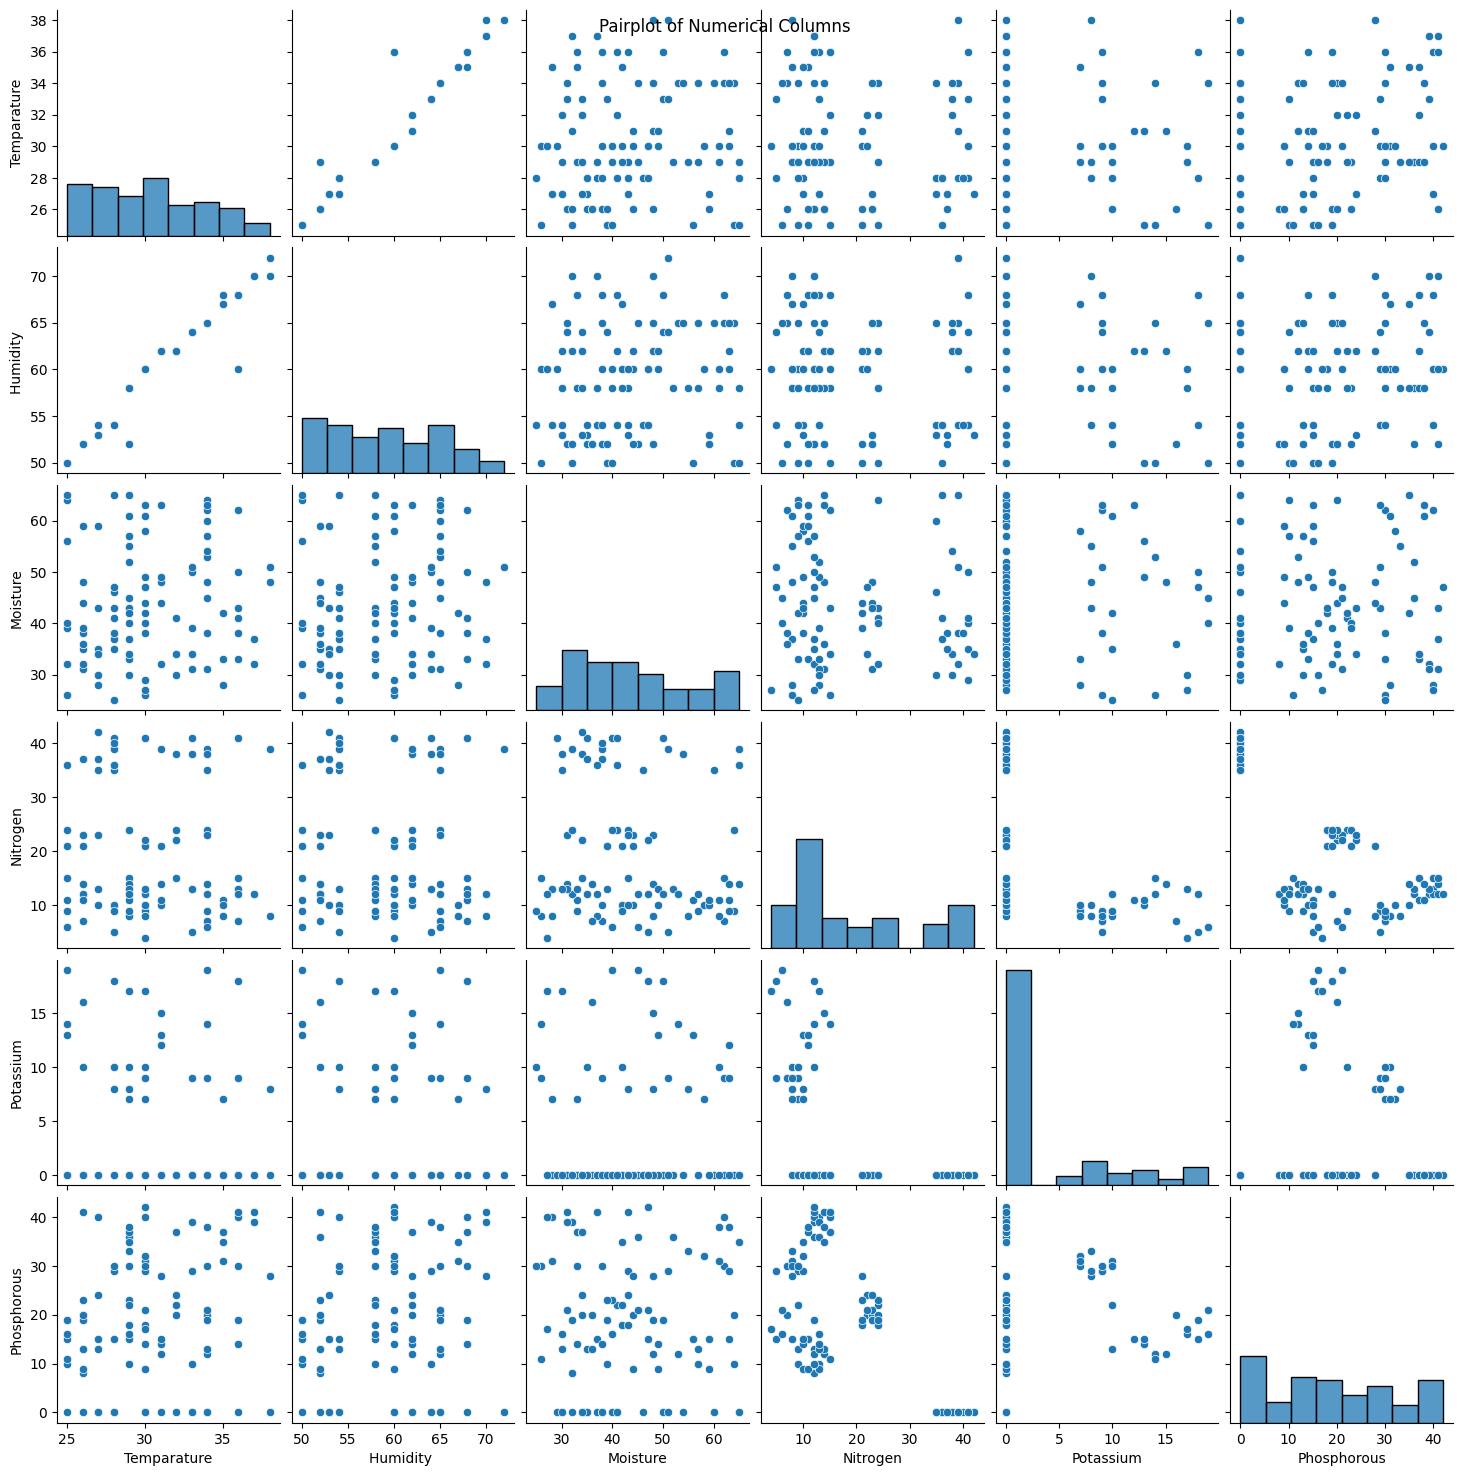

In [7]:
#Pairplot for numerical columns
sns.pairplot(dataset[['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']])
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

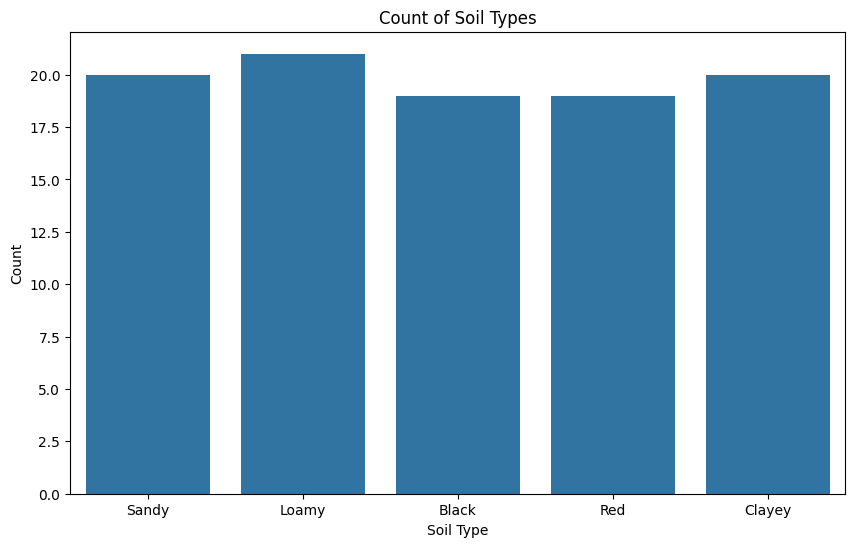

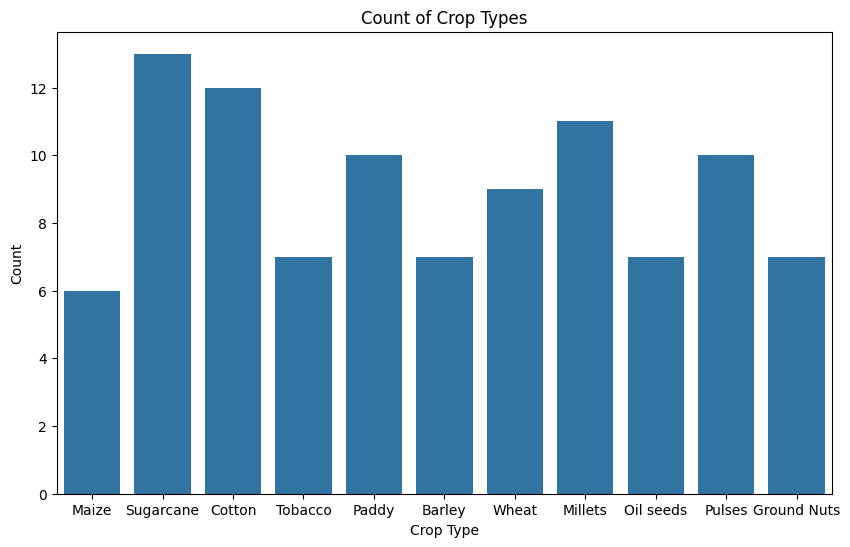

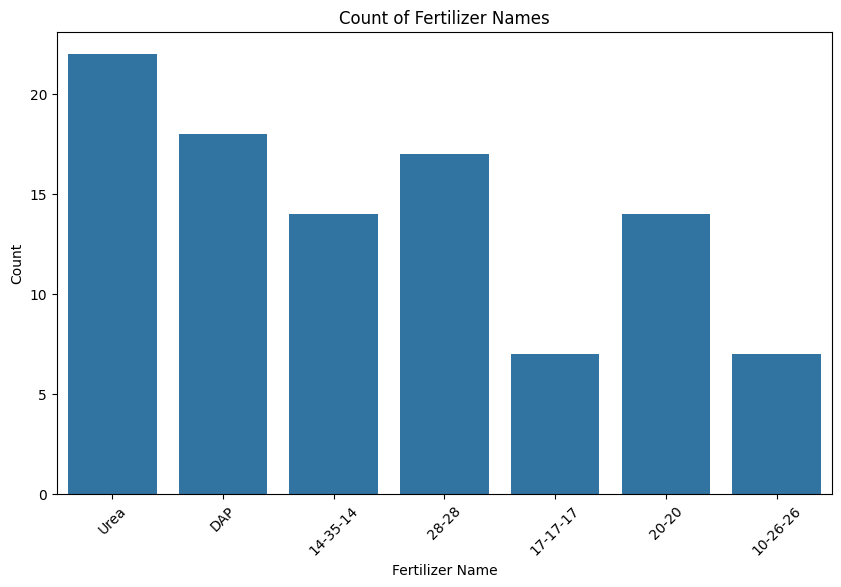

In [8]:
#Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Soil Type', data=dataset)
plt.title('Count of Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Crop Type', data=dataset)
plt.title('Count of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Fertilizer Name', data=dataset)
plt.title('Count of Fertilizer Names')
plt.xlabel('Fertilizer Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

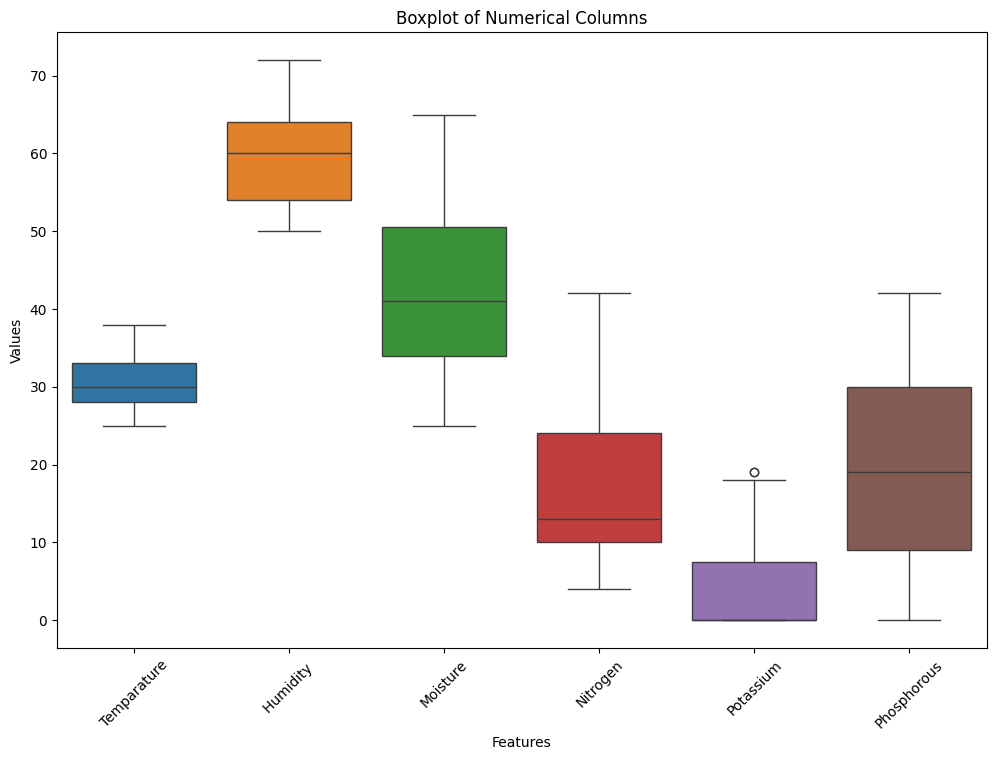

In [9]:
#box plot for detecting outliers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select numerical columns for boxplot
numerical_columns = ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

# Draw boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Select categorical columns for label encoding
categorical_columns = ['Soil Type', 'Crop Type', 'Fertilizer Name']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])
    
        
    # Print the mapping of original values to numerical labels
    print(f"Column: {col}")
    print("Original Value -> Encoded Label:")
    for original_value, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"{original_value} -> {encoded_label}")
    print()


    


Column: Soil Type
Original Value -> Encoded Label:
Black -> 0
Clayey -> 1
Loamy -> 2
Red -> 3
Sandy -> 4

Column: Crop Type
Original Value -> Encoded Label:
Barley -> 0
Cotton -> 1
Ground Nuts -> 2
Maize -> 3
Millets -> 4
Oil seeds -> 5
Paddy -> 6
Pulses -> 7
Sugarcane -> 8
Tobacco -> 9
Wheat -> 10

Column: Fertilizer Name
Original Value -> Encoded Label:
10-26-26 -> 0
14-35-14 -> 1
17-17-17 -> 2
20-20 -> 3
28-28 -> 4
DAP -> 5
Urea -> 6



In [11]:
# Display the encoded dataset
print(dataset.head())

   Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  \
0           26         52        38          4          3        37   
1           29         52        45          2          8        12   
2           34         65        62          0          1         7   
3           32         62        34          3          9        22   
4           28         54        46          1          6        35   

   Potassium  Phosphorous  Fertilizer Name  
0          0            0                6  
1          0           36                5  
2          9           30                1  
3          0           20                4  
4          0            0                6  


# Spliting of the data

In [12]:
import pandas as pd


# Assuming the target variable is 'Fertilizer Name'
# Extract features (X) by dropping the target column
X = dataset.drop(columns=['Fertilizer Name'])

# Extract target variable (y)
y = dataset['Fertilizer Name']

# Print the shapes of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (99, 8)
Shape of y: (99,)


# Building the model

# Random Forest

Accuracy: 95.0 %
Precision: 100.0 %
Recall: 95.0 %
F1 Score: 96.66666666666666 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      1.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.93      0.81        20
weighted avg       1.00      0.95      0.97        20



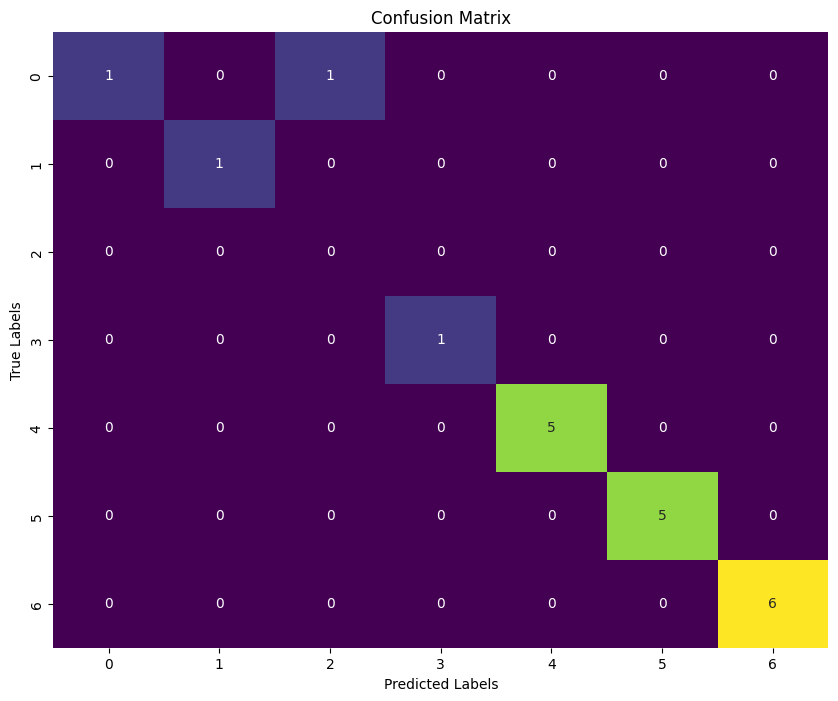

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, '%')

# Calculate and print precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print("Precision:", precision*100,'%')
print("Recall:", recall*100,'%')
print("F1 Score:", f1*100,'%')

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [14]:
import pickle

pickle.dump(random_forest, open('fertilizer_random.pkl', 'wb'))
